<img src="data/mu.jpg" alt="Data augmentation" title="Data augmentation" width="500"/>


## Import

In [69]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

# Libraries for modifying data
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate


## Fonctions (gaussian noise, gaussian blur, rotate, brightness, impulse noise)

In [70]:
def add_noise(images, noise_level=0.5):
    """
    Adds Gaussian noise to images from the digits dataset.

    Args:
        images (np.ndarray): Array of shape (n_images, 8, 8) containing the images.
        noise_level (float): Standard deviation of the added Gaussian noise (default is 0.5).

    Returns:
        np.ndarray: New noisy images with values between 0 and 16.
    """
    noisy_images = images + noise_level * np.random.randn(*images.shape)
    
    # Clamp values to the [0, 16] range
    noisy_images = np.clip(noisy_images, 0, 16)
    
    return noisy_images

In [71]:
def add_blur(images, sigma=1.0):
    """
    Applies Gaussian blur to the images.

    Args:
        images (np.ndarray): Array of shape (n_images, 8, 8).
        sigma (float): Degree of blur (the larger the sigma, the blurrier the image).

    Returns:
        np.ndarray: Blurred images.
    """
    blurred_images = np.array([gaussian_filter(img, sigma=sigma) for img in images])
    return np.clip(blurred_images, 0, 16)

In [72]:
def rotate_images(images, angle=15):
    """
    Rotates each image in the array around its center.

    Args:
        images (np.ndarray): Array of images with shape (n_images, 8, 8).
        angle (float): Rotation angle in degrees (positive = counterclockwise).

    Returns:
        np.ndarray: Rotated images, with the same shape as the original ones.
    """
    rotated = np.array([rotate(img, angle=angle, reshape=False, mode='nearest') for img in images])
    return np.clip(rotated, 0, 16)

In [73]:
def adjust_brightness(images, factor=1.2):
    """
    Adjusts the brightness of the images.

    Args:
        images (np.ndarray): Array of shape (n_images, 8, 8).
        factor (float): Brightness factor (>1 increases brightness, <1 decreases it).

    Returns:
        np.ndarray: Images with adjusted brightness.
    """
    bright_images = images * factor
    return np.clip(bright_images, 0, 16)

In [74]:
def add_impulse_noise(images, noise_ratio=0.05):
    """
    Adds impulse noise (salt & pepper) to the images.

    Args:
        images (np.ndarray): Array of images (n_images, 8, 8).
        noise_ratio (float): Proportion of pixels to corrupt (e.g., 0.05 = 5%).

    Returns:
        np.ndarray: Images with added impulse noise.
    """
    noisy_images = images.copy()
    n_images, h, w = images.shape
    n_total_pixels = h * w

    for idx in range(n_images):
        image = noisy_images[idx]
        n_noisy_pixels = int(noise_ratio * n_total_pixels)

        # Random noise positions
        coords = np.random.choice(n_total_pixels, n_noisy_pixels, replace=False)
        for c in coords:
            i, j = divmod(c, w)
            image[i, j] = np.random.choice([0, 16])  # salt or pepper

    return noisy_images

## Visualisation

In [75]:
def visualize_transform(images, transform, index=0, title = 'Transformed'):
    """
    Visualizes the original and transformed images side by side.

    Args:
        images (np.ndarray): Array of shape (n_images, 8, 8).
        transform (function): Transformation function to apply to the images.
    """
    transformed_images = transform(images)


    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(images[index], cmap='gray')
    axs[0].set_title("Original")
    axs[1].imshow(transformed_images[index], cmap='gray')
    axs[1].set_title(title)
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

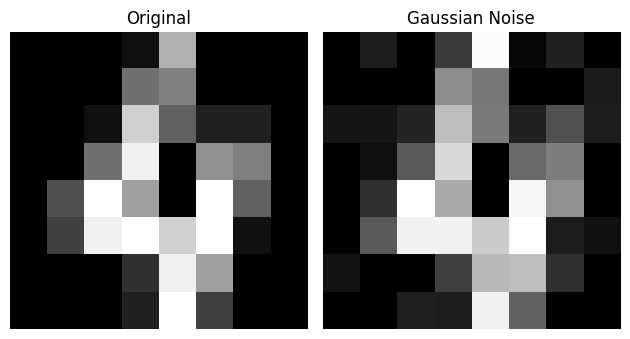

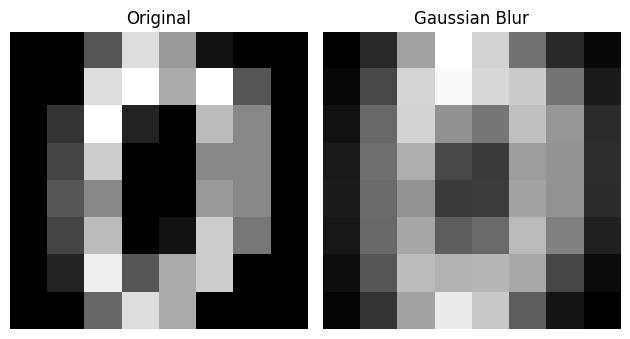

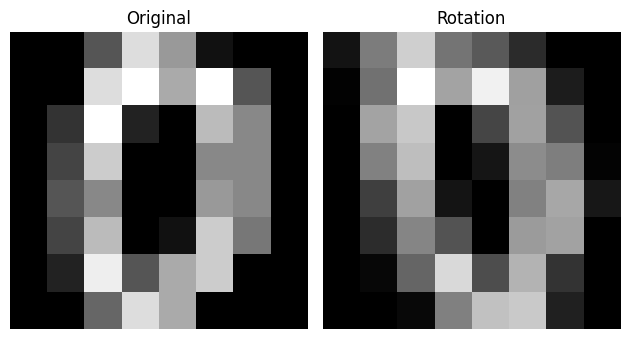

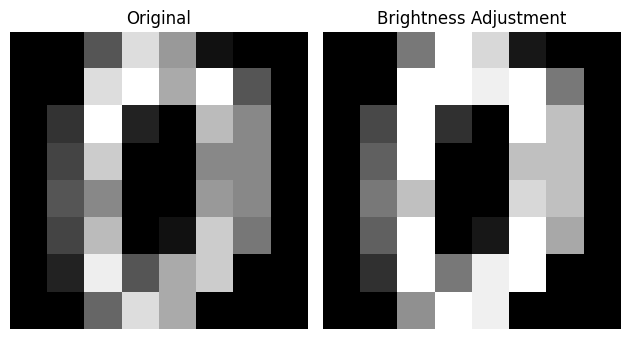

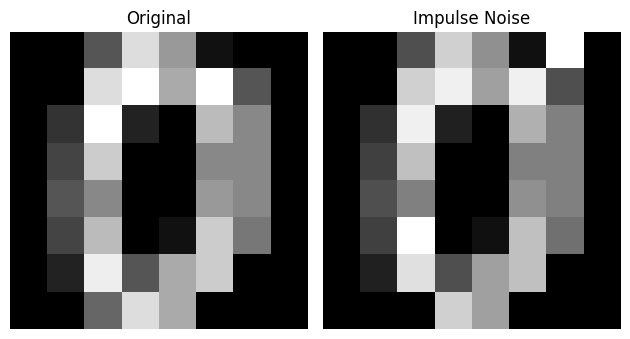

In [76]:
digits = load_digits()
images = digits.images

visualize_transform(images, lambda imgs : add_noise(imgs, noise_level=2.0), index=4, title='Gaussian Noise')
visualize_transform(images, lambda imgs : add_blur(imgs, sigma=0.75), title='Gaussian Blur')
visualize_transform(images, lambda imgs : rotate_images(imgs, angle=20), title= "Rotation")
visualize_transform(images, lambda imgs : adjust_brightness(imgs, factor=1.5), title='Brightness Adjustment')
visualize_transform(images, lambda imgs : add_impulse_noise(imgs, noise_ratio=0.05), title='Impulse Noise')

## Extract images 

### Images in numpy array

In [49]:
# Original images
digits = load_digits()
X = digits.images

In [50]:
# Noisy images
X_noisy = add_noise(X, noise_level=1.0)

In [51]:
# Blurred images
X_blur = add_blur(X, sigma=1.0)

In [52]:
# Rotated images
X_rotated = rotate_images(X, angle=15)

In [53]:
# Bright images
X_bright = adjust_brightness(X, factor=1.5)

In [54]:
# Impulse noise images
X_impulse = add_impulse_noise(X, noise_ratio=0.05)

### Images in csv files

In [58]:
def images_to_csv(images, filename):
    """
    Save images to a CSV file.

    Args:
        images (np.ndarray): Array of shape (n_images, 8, 8).
        filename (str): Name of the output CSV file.
    """
    n_images = images.shape[0]
    flat_images = images.reshape(n_images, -1)
    df = pd.DataFrame(flat_images)
    df['label'] = digits.target
    df.to_csv(filename, index=False)

### Images from dataframe

In [63]:
def visualize_image_from_df(df, index):
    """
    Visualizes an image from a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing images.
        index (int): Index of the image to visualize.
    """
    image = df.iloc[index, :-1].values.reshape(8, 8)
    label = df.iloc[index, -1]
    
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()